# Simple Approach to Multi-Label Classification

## 1. EDA

In [103]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [104]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [105]:
data_path = "coding/with_multi_tags/leetcode.csv"

In [106]:
data_raw = pd.read_csv(data_path)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(2114, 4)

In [107]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 2114
Number of columns in data = 4




**Sample data:**

,problem_statement,titleslug,title,tags
0,Given an array of integers nums and an integer...,two-sum,Two Sum,"Array, Hash Table"
1,You are given two non-empty linked lists repre...,add-two-numbers,Add Two Numbers,"Linked List, Math, Backtracking"
2,"Given a string s, find the length of the longe...",longest-substring-without-repeating-characters,Longest Substring Without Repeating Characters,"Hash Table, String, Sliding Window"
3,Given two sorted arrays nums1 and nums2 of siz...,median-of-two-sorted-arrays,Median of Two Sorted Arrays,"Array, Binary Search, Divide and Conquer"
4,"Given a string s, return the longest palindrom...",longest-palindromic-substring,Longest Palindromic Substring,"String, Dynamic Programming"


In [108]:
data_raw['tags'] = data_raw['tags'].str.split(', ')

# Count the frequency of each tag
tag_counts = data_raw['tags'].apply(pd.Series).stack().value_counts()

# Filter out tags that appear less than 60 times
tags_to_use = list(tag_counts[tag_counts > 60].index)

In [109]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=tags_to_use)


# Apply one-hot encoding on the tags column
tags_encoded = mlb.fit_transform(data_raw['tags'])


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:895: UserWarning: unknown class(es) ['Biconnected Component', 'Brainteaser', 'Combinatorics', 'Concurrency', 'Data Stream', 'Divide and Conquer', 'Enumeration', 'Eulerian Circuit', 'Game Theory', 'Geometry', 'Interactive', 'Iterator', 'Line Sweep', 'Minimum Spanning Tree', 'Number Theory', 'Ordered Set', 'Probability and Statistics', 'Randomized', 'Rejection Sampling', 'Reservoir Sampling', 'Rolling Hash', 'Shell', 'Shortest Path', 'Strongly Connected Component', 'Suffix Array', 'Trie', 'Union Find'] will be ignored
  warnings.warn(


In [110]:
print(tags_encoded.shape)

(2114, 25)


In [111]:
tags_encoded


array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [112]:
unique_tags = list(mlb.classes_)
print(unique_tags)

['Array', 'String', 'Hash Table', 'Dynamic Programming', 'Math', 'Tree', 'Sort', 'Greedy', 'Depth-First Search', 'Stack and Queue', 'Binary Search', 'Bit Manipulation', 'Breadth-First Search', 'Matrix', 'Two Pointers', 'Heap (Priority Queue)', 'Backtracking', 'Simulation', 'Prefix Sum', 'Graph', 'Counting', 'Design', 'Database', 'Sliding Window', 'Linked List']


In [113]:
# Define the list of lists
# list_of_lists = data_raw['tags']

# Flatten the list of lists into a single list using list comprehension
# flat_list = [item for sublist in list_of_lists for item in sublist]

# Use set() to get unique entries
# unique_entries = set(flat_list)
# unique_entries= list(unique_entries)
# print(unique_entries)

unique_entries = unique_tags

In [114]:
import pandas as pd

# Load the CSV file into a pandas DataFrame


# Define the 2D matrix with the new data

# Define the list of column names for the new data


# Create a new pandas DataFrame from the 2D matrix
new_df = pd.DataFrame(tags_encoded, columns=unique_tags)

# Concatenate the two DataFrames along axis 1 (columns)
merged_df = pd.concat([data_raw, new_df], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('coding/with_multi_tags/leetcode_mod.csv', index=False)




In [115]:
data_raw = pd.read_csv('coding/with_multi_tags/leetcode_mod.csv')

In [116]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset into a Pandas dataframe
data = data_raw

# Split the dataset into input features and target variable
X = data["problem_statement"] # Input features (question description)
y = data["Array"] # Target variable (binary value)

# Convert the text data into numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data and calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)


Accuracy: 0.8486997635933806


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 1.1. Checking for missing values

In [117]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

problem_statement        0
titleslug                0
title                    0
tags                     0
Array                    0
String                   0
Hash Table               0
Dynamic Programming      0
Math                     0
Tree                     0
Sort                     0
Greedy                   0
Depth-First Search       0
Stack and Queue          0
Binary Search            0
Bit Manipulation         0
Breadth-First Search     0
Matrix                   0
Two Pointers             0
Heap (Priority Queue)    0
Backtracking             0
Simulation               0
Prefix Sum               0
Graph                    0
Counting                 0
Design                   0
Database                 0
Sliding Window           0
Linked List              0
dtype: int64


### 1.2. Calculating number of comments under each label

In [118]:
categories = list(data_raw.columns.values)
categories = categories[4:]
print(categories)

['Array', 'String', 'Hash Table', 'Dynamic Programming', 'Math', 'Tree', 'Sort', 'Greedy', 'Depth-First Search', 'Stack and Queue', 'Binary Search', 'Bit Manipulation', 'Breadth-First Search', 'Matrix', 'Two Pointers', 'Heap (Priority Queue)', 'Backtracking', 'Simulation', 'Prefix Sum', 'Graph', 'Counting', 'Design', 'Database', 'Sliding Window', 'Linked List']


In [119]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats
for i in range(len(df_stats['category'])):
    print(df_stats['category'].iloc[i], '  :  ', df_stats['number of comments'].iloc[i])

Array   :   1150
String   :   521
Hash Table   :   401
Dynamic Programming   :   366
Math   :   371
Tree   :   192
Sort   :   304
Greedy   :   263
Depth-First Search   :   204
Stack and Queue   :   143
Binary Search   :   191
Bit Manipulation   :   143
Breadth-First Search   :   173
Matrix   :   160
Two Pointers   :   142
Heap (Priority Queue)   :   122
Backtracking   :   115
Simulation   :   107
Prefix Sum   :   107
Graph   :   95
Counting   :   89
Design   :   87
Database   :   77
Sliding Window   :   72
Linked List   :   60


## 2. Data Pre-Processing

In [120]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [121]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [122]:
data['problem_statement'] = data['problem_statement'].str.lower()
data['problem_statement'] = data['problem_statement'].apply(cleanHtml)
data['problem_statement'] = data['problem_statement'].apply(cleanPunc)
data['problem_statement'] = data['problem_statement'].apply(keepAlpha)
data.head()

,problem_statement,titleslug,title,tags,Array,String,Hash Table,Dynamic Programming,Math,Tree,...,Heap (Priority Queue),Backtracking,Simulation,Prefix Sum,Graph,Counting,Design,Database,Sliding Window,Linked List
0,given an array of integers nums and an integer...,two-sum,Two Sum,"['Array', 'Hash Table']",1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,you are given two non empty linked lists repre...,add-two-numbers,Add Two Numbers,"['Linked List', 'Math', 'Backtracking']",0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,given a string s find the length of the longes...,longest-substring-without-repeating-characters,Longest Substring Without Repeating Characters,"['Hash Table', 'String', 'Sliding Window']",0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,given two sorted arrays nums and nums of siz...,median-of-two-sorted-arrays,Median of Two Sorted Arrays,"['Array', 'Binary Search', 'Divide and Conquer']",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,given a string s return the longest palindromi...,longest-palindromic-substring,Longest Palindromic Substring,"['String', 'Dynamic Programming']",0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2.2. Removing Stop Words

In [124]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['problem_statement'] = data['problem_statement'].apply(removeStopWords)
data.head()

,problem_statement,titleslug,title,tags,Array,String,Hash Table,Dynamic Programming,Math,Tree,...,Heap (Priority Queue),Backtracking,Simulation,Prefix Sum,Graph,Counting,Design,Database,Sliding Window,Linked List
0,given array integers nums integer target r...,two-sum,Two Sum,"['Array', 'Hash Table']",1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,given non empty linked lists representing ...,add-two-numbers,Add Two Numbers,"['Linked List', 'Math', 'Backtracking']",0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,given string find length longest substrin...,longest-substring-without-repeating-characters,Longest Substring Without Repeating Characters,"['Hash Table', 'String', 'Sliding Window']",0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,given sorted arrays nums nums size n re...,median-of-two-sorted-arrays,Median of Two Sorted Arrays,"['Array', 'Binary Search', 'Divide and Conquer']",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,given string return longest palindromic sub...,longest-palindromic-substring,Longest Palindromic Substring,"['String', 'Dynamic Programming']",0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2.3. Stemming

In [126]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['problem_statement'] = data['problem_statement'].apply(stemming)
data.head()

,problem_statement,titleslug,title,tags,Array,String,Hash Table,Dynamic Programming,Math,Tree,...,Heap (Priority Queue),Backtracking,Simulation,Prefix Sum,Graph,Counting,Design,Database,Sliding Window,Linked List
0,given array integ num integ target return indi...,two-sum,Two Sum,"['Array', 'Hash Table']",1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,given non empti link list repres non negat int...,add-two-numbers,Add Two Numbers,"['Linked List', 'Math', 'Backtracking']",0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,given string find length longest substr withou...,longest-substring-without-repeating-characters,Longest Substring Without Repeating Characters,"['Hash Table', 'String', 'Sliding Window']",0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,given sort array num num size n respect return...,median-of-two-sorted-arrays,Median of Two Sorted Arrays,"['Array', 'Binary Search', 'Divide and Conquer']",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,given string return longest palindrom substr s,longest-palindromic-substring,Longest Palindromic Substring,"['String', 'Dynamic Programming']",0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


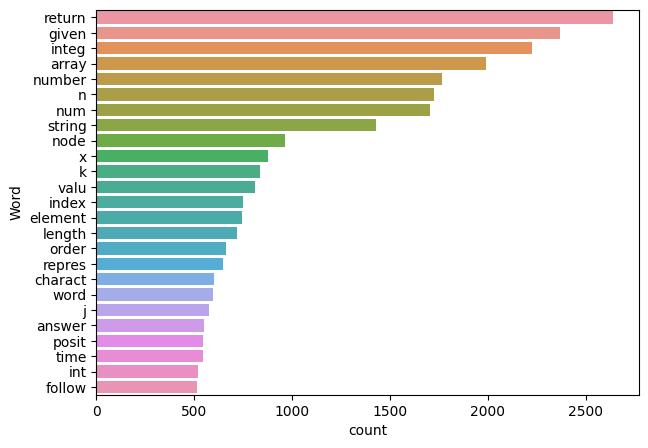

In [148]:
def freqwords(x, terms): 
  allwords = ' '.join([text for text in x]) 
  allwords = allwords.split() 
  fdist = nltk.FreqDist(allwords) 
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = wordsdf.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(7,5)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 25 most frequent words 
freqwords(data['problem_statement'], 25)

### 2.4. Train-Test Split

In [127]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.20, shuffle=True)

print(train.shape)
print(test.shape)

(1691, 29)
(423, 29)


In [128]:
train_text = train['problem_statement']
test_text = test['problem_statement']

### 2.5. TF-IDF

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [133]:
x_train = vectorizer.transform(train_text)
y_train = train['Array']

x_test = vectorizer.transform(test_text)
y_test = test['Array']

## **Logistic Regression**
 

In [134]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [135]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       202
           1       0.86      0.87      0.87       221

    accuracy                           0.86       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.86      0.86      0.86       423



array([[172,  30],
       [ 29, 192]], dtype=int64)

In [136]:
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.8605200945626478


In [137]:
from sklearn.linear_model import LogisticRegression

sum=0
count=0
for category in unique_entries:
    printmd('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    try:
        logmodel.fit(x_train, train[category])
        count+=1
    except:
        pass

      
    
    # calculating test accuracy
    prediction = logmodel.predict(x_test)
    acc=accuracy_score(test[category], prediction)
    sum+=acc
    print('Test accuracy is {}'.format(acc))
    print("\n")
ans =sum/count
printmd('**Overall accuracy is {}**'.format(ans))
print("\n")

**Processing Array comments...**

Test accuracy is 0.8605200945626478




**Processing String comments...**

Test accuracy is 0.8936170212765957




**Processing Hash Table comments...**

Test accuracy is 0.8108747044917257




**Processing Dynamic Programming comments...**

Test accuracy is 0.8156028368794326




**Processing Math comments...**

Test accuracy is 0.806146572104019




**Processing Tree comments...**

Test accuracy is 0.9196217494089834




**Processing Sort comments...**

Test accuracy is 0.8676122931442081




**Processing Greedy comments...**

Test accuracy is 0.8534278959810875




**Processing Depth-First Search comments...**

Test accuracy is 0.9196217494089834




**Processing Stack and Queue comments...**

Test accuracy is 0.9314420803782506




**Processing Binary Search comments...**

Test accuracy is 0.9054373522458629




**Processing Bit Manipulation comments...**

Test accuracy is 0.9456264775413712




**Processing Breadth-First Search comments...**

Test accuracy is 0.9101654846335697




**Processing Matrix comments...**

Test accuracy is 0.9314420803782506




**Processing Two Pointers comments...**

Test accuracy is 0.9243498817966903




**Processing Heap (Priority Queue) comments...**

Test accuracy is 0.9479905437352246




**Processing Backtracking comments...**

Test accuracy is 0.9527186761229315




**Processing Simulation comments...**

Test accuracy is 0.9621749408983451




**Processing Prefix Sum comments...**

Test accuracy is 0.9314420803782506




**Processing Graph comments...**

Test accuracy is 0.9645390070921985




**Processing Counting comments...**

Test accuracy is 0.9598108747044918




**Processing Design comments...**

Test accuracy is 0.9645390070921985




**Processing Database comments...**

Test accuracy is 0.9716312056737588




**Processing Sliding Window comments...**

Test accuracy is 0.9739952718676123




**Processing Linked List comments...**

Test accuracy is 0.983451536643026




**Overall accuracy is 0.9163120567375888**

## **Decision Tree**

In [138]:
import pandas as pd
import numpy as np
import nltk
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [139]:
 dt = DecisionTreeClassifier(criterion = 'entropy')
# dt.fit(xtrain_tfidf,ytrain)
# dtpred=dt.predict(xtest_tfidf)
sum=0
count=0
for category in unique_entries:
    printmd('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    try:
        dt.fit(x_train, train[category])
        count+=1
    except:
        pass

      
    
    # calculating test accuracy
    prediction = dt.predict(x_test)
    acc=accuracy_score(test[category], prediction)
    sum+=acc
    print('Test accuracy is {}'.format(acc))
    print("\n")
ans =sum/count
printmd('**Overall accuracy is {}**'.format(ans))
print("\n")


**Processing Array comments...**

Test accuracy is 0.8605200945626478




**Processing String comments...**

Test accuracy is 0.9550827423167849




**Processing Hash Table comments...**

Test accuracy is 0.7706855791962175




**Processing Dynamic Programming comments...**

Test accuracy is 0.7683215130023641




**Processing Math comments...**

Test accuracy is 0.8037825059101655




**Processing Tree comments...**

Test accuracy is 0.9692671394799054




**Processing Sort comments...**

Test accuracy is 0.817966903073286




**Processing Greedy comments...**

Test accuracy is 0.851063829787234




**Processing Depth-First Search comments...**

Test accuracy is 0.933806146572104




**Processing Stack and Queue comments...**

Test accuracy is 0.9314420803782506




**Processing Binary Search comments...**

Test accuracy is 0.8888888888888888




**Processing Bit Manipulation comments...**

Test accuracy is 0.9385342789598109




**Processing Breadth-First Search comments...**

Test accuracy is 0.8959810874704491




**Processing Matrix comments...**

Test accuracy is 0.9645390070921985




**Processing Two Pointers comments...**

Test accuracy is 0.8865248226950354




**Processing Heap (Priority Queue) comments...**

Test accuracy is 0.9125295508274232




**Processing Backtracking comments...**

Test accuracy is 0.9290780141843972




**Processing Simulation comments...**

Test accuracy is 0.9290780141843972




**Processing Prefix Sum comments...**

Test accuracy is 0.9101654846335697




**Processing Graph comments...**

Test accuracy is 0.9763593380614657




**Processing Counting comments...**

Test accuracy is 0.9432624113475178




**Processing Design comments...**

Test accuracy is 0.9881796690307328




**Processing Database comments...**

Test accuracy is 1.0




**Processing Sliding Window comments...**

Test accuracy is 0.966903073286052




**Processing Linked List comments...**

Test accuracy is 0.9952718676122931




**Overall accuracy is 0.9114893617021277**

## **Naive Bayes**

In [140]:
naive_bayes = MultinomialNB()
sum=0
count=0
for category in unique_entries:
    printmd('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    try:
        naive_bayes.fit(x_train, train[category])
        count+=1
    except:
        pass

      
    
    # calculating test accuracy
    prediction = naive_bayes.predict(x_test)
    acc=accuracy_score(test[category], prediction)
    sum+=acc
    print('Test accuracy is {}'.format(acc))
    print("\n")
ans =sum/count
printmd('**Overall accuracy is {}**'.format(ans))
print("\n")

**Processing Array comments...**

Test accuracy is 0.806146572104019




**Processing String comments...**

Test accuracy is 0.8747044917257684




**Processing Hash Table comments...**

Test accuracy is 0.8108747044917257




**Processing Dynamic Programming comments...**

Test accuracy is 0.8156028368794326




**Processing Math comments...**

Test accuracy is 0.7990543735224587




**Processing Tree comments...**

Test accuracy is 0.9196217494089834




**Processing Sort comments...**

Test accuracy is 0.8676122931442081




**Processing Greedy comments...**

Test accuracy is 0.8534278959810875




**Processing Depth-First Search comments...**

Test accuracy is 0.9148936170212766




**Processing Stack and Queue comments...**

Test accuracy is 0.9314420803782506




**Processing Binary Search comments...**

Test accuracy is 0.9054373522458629




**Processing Bit Manipulation comments...**

Test accuracy is 0.9456264775413712




**Processing Breadth-First Search comments...**

Test accuracy is 0.9101654846335697




**Processing Matrix comments...**

Test accuracy is 0.9196217494089834




**Processing Two Pointers comments...**

Test accuracy is 0.9243498817966903




**Processing Heap (Priority Queue) comments...**

Test accuracy is 0.9479905437352246




**Processing Backtracking comments...**

Test accuracy is 0.9527186761229315




**Processing Simulation comments...**

Test accuracy is 0.9621749408983451




**Processing Prefix Sum comments...**

Test accuracy is 0.9314420803782506




**Processing Graph comments...**

Test accuracy is 0.9598108747044918




**Processing Counting comments...**

Test accuracy is 0.9598108747044918




**Processing Design comments...**

Test accuracy is 0.9645390070921985




**Processing Database comments...**

Test accuracy is 0.9929078014184397




**Processing Sliding Window comments...**

Test accuracy is 0.9739952718676123




**Processing Linked List comments...**

Test accuracy is 0.9810874704491725




**Overall accuracy is 0.9130023640661937**

## **KNN**

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sum=0
count=0
for category in unique_entries:
    printmd('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    try:
        knn.fit(x_train, train[category])
        count+=1
    except:
        pass

      
    
    # calculating test accuracy
    prediction = knn.predict(x_test)
    acc=accuracy_score(test[category], prediction)
    sum+=acc
    print('Test accuracy is {}'.format(acc))
    print("\n")
ans =sum/count
printmd('**Overall accuracy is {}**'.format(ans))
print("\n")

**Processing Array comments...**

Test accuracy is 0.7872340425531915




**Processing String comments...**

Test accuracy is 0.9290780141843972




**Processing Hash Table comments...**

Test accuracy is 0.7848699763593381




**Processing Dynamic Programming comments...**

Test accuracy is 0.8226950354609929




**Processing Math comments...**

Test accuracy is 0.8321513002364066




**Processing Tree comments...**

Test accuracy is 0.9527186761229315




**Processing Sort comments...**

Test accuracy is 0.8557919621749409




**Processing Greedy comments...**

Test accuracy is 0.8439716312056738




**Processing Depth-First Search comments...**

Test accuracy is 0.9408983451536643




**Processing Stack and Queue comments...**

Test accuracy is 0.9385342789598109




**Processing Binary Search comments...**

Test accuracy is 0.900709219858156




**Processing Bit Manipulation comments...**

Test accuracy is 0.9408983451536643




**Processing Breadth-First Search comments...**

Test accuracy is 0.9148936170212766




**Processing Matrix comments...**

Test accuracy is 0.9763593380614657




**Processing Two Pointers comments...**

Test accuracy is 0.9219858156028369




**Processing Heap (Priority Queue) comments...**

Test accuracy is 0.9456264775413712




**Processing Backtracking comments...**

Test accuracy is 0.9456264775413712




**Processing Simulation comments...**

Test accuracy is 0.9550827423167849




**Processing Prefix Sum comments...**

Test accuracy is 0.9243498817966903




**Processing Graph comments...**

Test accuracy is 0.9810874704491725




**Processing Counting comments...**

Test accuracy is 0.9550827423167849




**Processing Design comments...**

Test accuracy is 0.966903073286052




**Processing Database comments...**

Test accuracy is 0.9952718676122931




**Processing Sliding Window comments...**

Test accuracy is 0.9739952718676123




**Processing Linked List comments...**

Test accuracy is 0.9929078014184397




**Overall accuracy is 0.9191489361702126**

## **Random Forest**

In [142]:
rf = RandomForestClassifier(n_estimators=200)
sum=0
count=0
for category in unique_entries:
    printmd('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    try:
        rf.fit(x_train, train[category])
        count+=1
    except:
        pass

      
    
    # calculating test accuracy
    prediction = rf.predict(x_test)
    acc=accuracy_score(test[category], prediction)
    sum+=acc
    print('Test accuracy is {}'.format(acc))
    print("\n")
ans =sum/count
printmd('**Overall accuracy is {}**'.format(ans))
print("\n")

**Processing Array comments...**

Test accuracy is 0.8936170212765957




**Processing String comments...**

Test accuracy is 0.9479905437352246




**Processing Hash Table comments...**

Test accuracy is 0.8132387706855791




**Processing Dynamic Programming comments...**

Test accuracy is 0.8392434988179669




**Processing Math comments...**

Test accuracy is 0.8250591016548463




**Processing Tree comments...**

Test accuracy is 0.9716312056737588




**Processing Sort comments...**

Test accuracy is 0.8699763593380615




**Processing Greedy comments...**

Test accuracy is 0.8557919621749409




**Processing Depth-First Search comments...**

Test accuracy is 0.9479905437352246




**Processing Stack and Queue comments...**

Test accuracy is 0.9432624113475178




**Processing Binary Search comments...**

Test accuracy is 0.900709219858156




**Processing Bit Manipulation comments...**

Test accuracy is 0.9550827423167849




**Processing Breadth-First Search comments...**

Test accuracy is 0.9148936170212766




**Processing Matrix comments...**

Test accuracy is 0.9527186761229315




**Processing Two Pointers comments...**

Test accuracy is 0.9219858156028369




**Processing Heap (Priority Queue) comments...**

Test accuracy is 0.9479905437352246




**Processing Backtracking comments...**

Test accuracy is 0.9527186761229315




**Processing Simulation comments...**

Test accuracy is 0.9621749408983451




**Processing Prefix Sum comments...**

Test accuracy is 0.9314420803782506




**Processing Graph comments...**

Test accuracy is 0.9881796690307328




**Processing Counting comments...**

Test accuracy is 0.9598108747044918




**Processing Design comments...**

Test accuracy is 0.9787234042553191




**Processing Database comments...**

Test accuracy is 1.0




**Processing Sliding Window comments...**

Test accuracy is 0.9739952718676123




**Processing Linked List comments...**

Test accuracy is 0.9976359338061466




**Overall accuracy is 0.9298345153664301**

## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [144]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
sum=0
count=0
for category in unique_entries:
    printmd('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    acc=accuracy_score(test[category], prediction)
    sum+=acc
    count += 1
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")
    
ans =sum/count
printmd('**Overall accuracy is {}**'.format(ans))
print("\n")

**Processing Array comments...**

Test accuracy is 0.8605200945626478




**Processing String comments...**

Test accuracy is 0.8936170212765957




**Processing Hash Table comments...**

Test accuracy is 0.8108747044917257




**Processing Dynamic Programming comments...**

Test accuracy is 0.8156028368794326




**Processing Math comments...**

Test accuracy is 0.806146572104019




**Processing Tree comments...**

Test accuracy is 0.9196217494089834




**Processing Sort comments...**

Test accuracy is 0.8676122931442081




**Processing Greedy comments...**

Test accuracy is 0.8534278959810875




**Processing Depth-First Search comments...**

Test accuracy is 0.9196217494089834




**Processing Stack and Queue comments...**

Test accuracy is 0.9314420803782506




**Processing Binary Search comments...**

Test accuracy is 0.9054373522458629




**Processing Bit Manipulation comments...**

Test accuracy is 0.9456264775413712




**Processing Breadth-First Search comments...**

Test accuracy is 0.9101654846335697




**Processing Matrix comments...**

Test accuracy is 0.9314420803782506




**Processing Two Pointers comments...**

Test accuracy is 0.9243498817966903




**Processing Heap (Priority Queue) comments...**

Test accuracy is 0.9479905437352246




**Processing Backtracking comments...**

Test accuracy is 0.9527186761229315




**Processing Simulation comments...**

Test accuracy is 0.9621749408983451




**Processing Prefix Sum comments...**

Test accuracy is 0.9314420803782506




**Processing Graph comments...**

Test accuracy is 0.9645390070921985




**Processing Counting comments...**

Test accuracy is 0.9598108747044918




**Processing Design comments...**

Test accuracy is 0.9645390070921985




**Processing Database comments...**

Test accuracy is 0.9716312056737588




**Processing Sliding Window comments...**

Test accuracy is 0.9739952718676123




**Processing Linked List comments...**

Test accuracy is 0.983451536643026




**Overall accuracy is 0.8701654846335697**



CPU times: total: 312 ms
Wall time: 5.44 s
